In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl
from sklearn import linear_model
import seaborn as sns

import math 


In [2]:
data = pd.read_csv("official_influencers_new - official_influencers.csv")
data = data.head(39)
data

,ranking,username,alias,categories,engagement,followers,following,total_posts,latest_post,post_type,likes_per_post,comments_per_post,partnership_posts,channel_associated_on_bio,subscription_date,content
0,1.0,@gessicakayane,gessicakayane,"['Humor', 'Celebrities', 'Animals & Pets']",2.00,15.2,854.0,2783.0,1.0,video,351000.0,4043.0,0,no,09/2012,NaN
1,1.0,@gessicakayane,gessicakayane,"['Humor', 'Celebrities', 'Animals & Pets']",2.00,15.2,854.0,2783.0,2.0,video,401000.0,2538.0,0,no,09/2012,NaN
2,1.0,@gessicakayane,gessicakayane,"['Humor', 'Celebrities', 'Animals & Pets']",2.00,15.2,854.0,2783.0,3.0,caroussel,96600.0,1790.0,0,no,09/2012,NaN
3,2.0,@andressasuita,andressasuita,"['Modeling', 'Celebrities', 'Animals & Pets', ...",2.19,15.7,1805.0,3453.0,1.0,picture,505000.0,3084.0,no,youtube,03/2012,NaN
4,2.0,@andressasuita,andressasuita,"['Modeling', 'Celebrities', 'Animals & Pets', ...",2.19,15.7,1805.0,3453.0,2.0,video,34500.0,763.0,yes,youtube,03/2012,NaN
5,2.0,@andressasuita,andressasuita,"['Modeling', 'Celebrities', 'Animals & Pets', ...",2.19,15.7,1805.0,3453.0,3.0,caroussel,89900.0,712.0,no,youtube,03/2012,NaN
6,3.0,@leonardo,leonardo,['Music'],1.00,15.9,147.0,2288.0,1.0,video,10700.0,226.0,yes,music,08/2012,NaN
7,3.0,@leonardo,leonardo,['Music'],1.00,15.9,147.0,2288.0,2.0,video,874000.0,29800.0,no,music,08/2012,NaN
8,3.0,@leonardo,leonardo,['Music'],1.00,15.9,147.0,2288.0,3.0,video,69900.0,965.0,no,music,08/2012,NaN
9,4.0,@taina,taina,"['Marketing and Advertising', 'Modeling']",3.07,16.1,1920.0,953.0,1.0,caroussel,486000.0,2373.0,no,"youtube, twitter",NaN,NaN


In [5]:
data.head(9)

,ranking,username,alias,categories,engagement,followers,following,total_posts,latest_post,post_type,likes_per_post,comments_per_post,partnership_posts,channel_associated_on_bio,subscription_date,content
0,1.0,@gessicakayane,gessicakayane,"['Humor', 'Celebrities', 'Animals & Pets']",2.00,15.2,854.0,2783.0,1.0,video,351000.0,4043.0,0,no,09/2012,NaN
1,1.0,@gessicakayane,gessicakayane,"['Humor', 'Celebrities', 'Animals & Pets']",2.00,15.2,854.0,2783.0,2.0,video,401000.0,2538.0,0,no,09/2012,NaN
2,1.0,@gessicakayane,gessicakayane,"['Humor', 'Celebrities', 'Animals & Pets']",2.00,15.2,854.0,2783.0,3.0,caroussel,96600.0,1790.0,0,no,09/2012,NaN
3,2.0,@andressasuita,andressasuita,"['Modeling', 'Celebrities', 'Animals & Pets', ...",2.19,15.7,1805.0,3453.0,1.0,picture,505000.0,3084.0,no,youtube,03/2012,NaN
4,2.0,@andressasuita,andressasuita,"['Modeling', 'Celebrities', 'Animals & Pets', ...",2.19,15.7,1805.0,3453.0,2.0,video,34500.0,763.0,yes,youtube,03/2012,NaN
5,2.0,@andressasuita,andressasuita,"['Modeling', 'Celebrities', 'Animals & Pets', ...",2.19,15.7,1805.0,3453.0,3.0,caroussel,89900.0,712.0,no,youtube,03/2012,NaN
6,3.0,@leonardo,leonardo,['Music'],1.00,15.9,147.0,2288.0,1.0,video,10700.0,226.0,yes,music,08/2012,NaN
7,3.0,@leonardo,leonardo,['Music'],1.00,15.9,147.0,2288.0,2.0,video,874000.0,29800.0,no,music,08/2012,NaN
8,3.0,@leonardo,leonardo,['Music'],1.00,15.9,147.0,2288.0,3.0,video,69900.0,965.0,no,music,08/2012,NaN


In [29]:
print(data["engagement"].max())
print(data["engagement"].min())
print(data["engagement"].mean())
print(data["engagement"].median())


9.13
0.2
2.3423076923076915
1.6


In [36]:
condition = data["engagement"] < 0
data["engagement"][condition]

Series([], Name: engagement, dtype: float64)

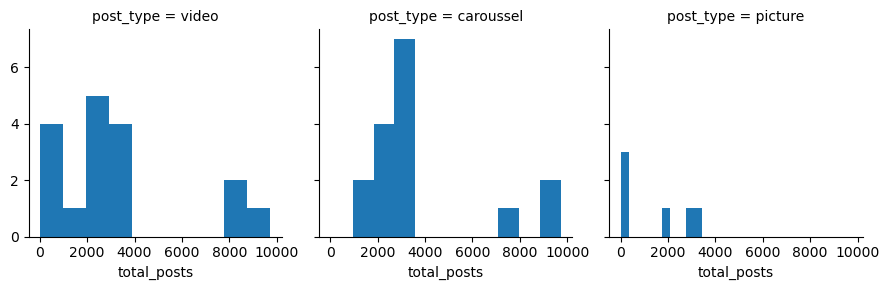

In [45]:
graph = sns.FacetGrid(data, col='post_type')
graph.map(plt.hist, 'total_posts')
plt.show()

In [47]:
print(data["post_type"].value_counts())
print(data["total_posts"].value_counts())

video        17
caroussel    16
picture       6
Name: post_type, dtype: int64
2783.0    3
3453.0    3
2288.0    3
953.0     3
1917.0    3
9728.0    3
7905.0    3
3098.0    3
15.0      3
28.0      3
1946.0    3
3209.0    3
2980.0    3
Name: total_posts, dtype: int64


c:\Users\Cristiana\anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


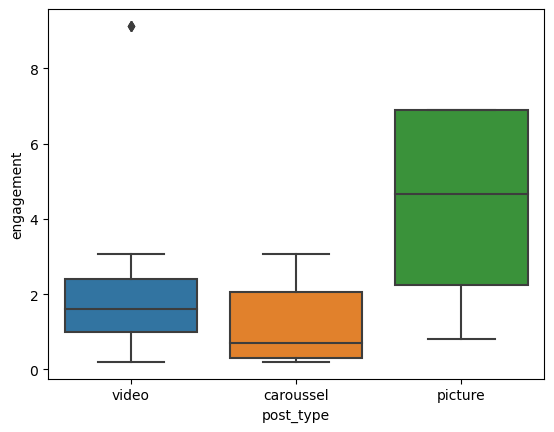

In [44]:
sns.boxplot(data.post_type, data.engagement)
plt.show()

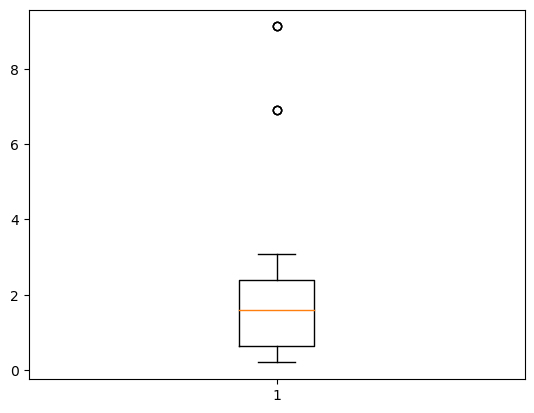

In [33]:
plt.boxplot(data.engagement)
plt.show()

c:\Users\Cristiana\anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


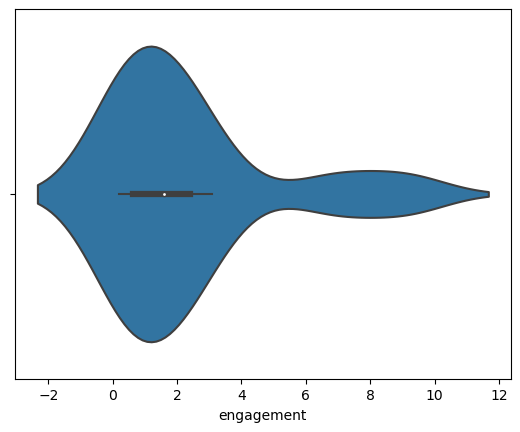

In [35]:
sns.violinplot(data.engagement)
plt.show()

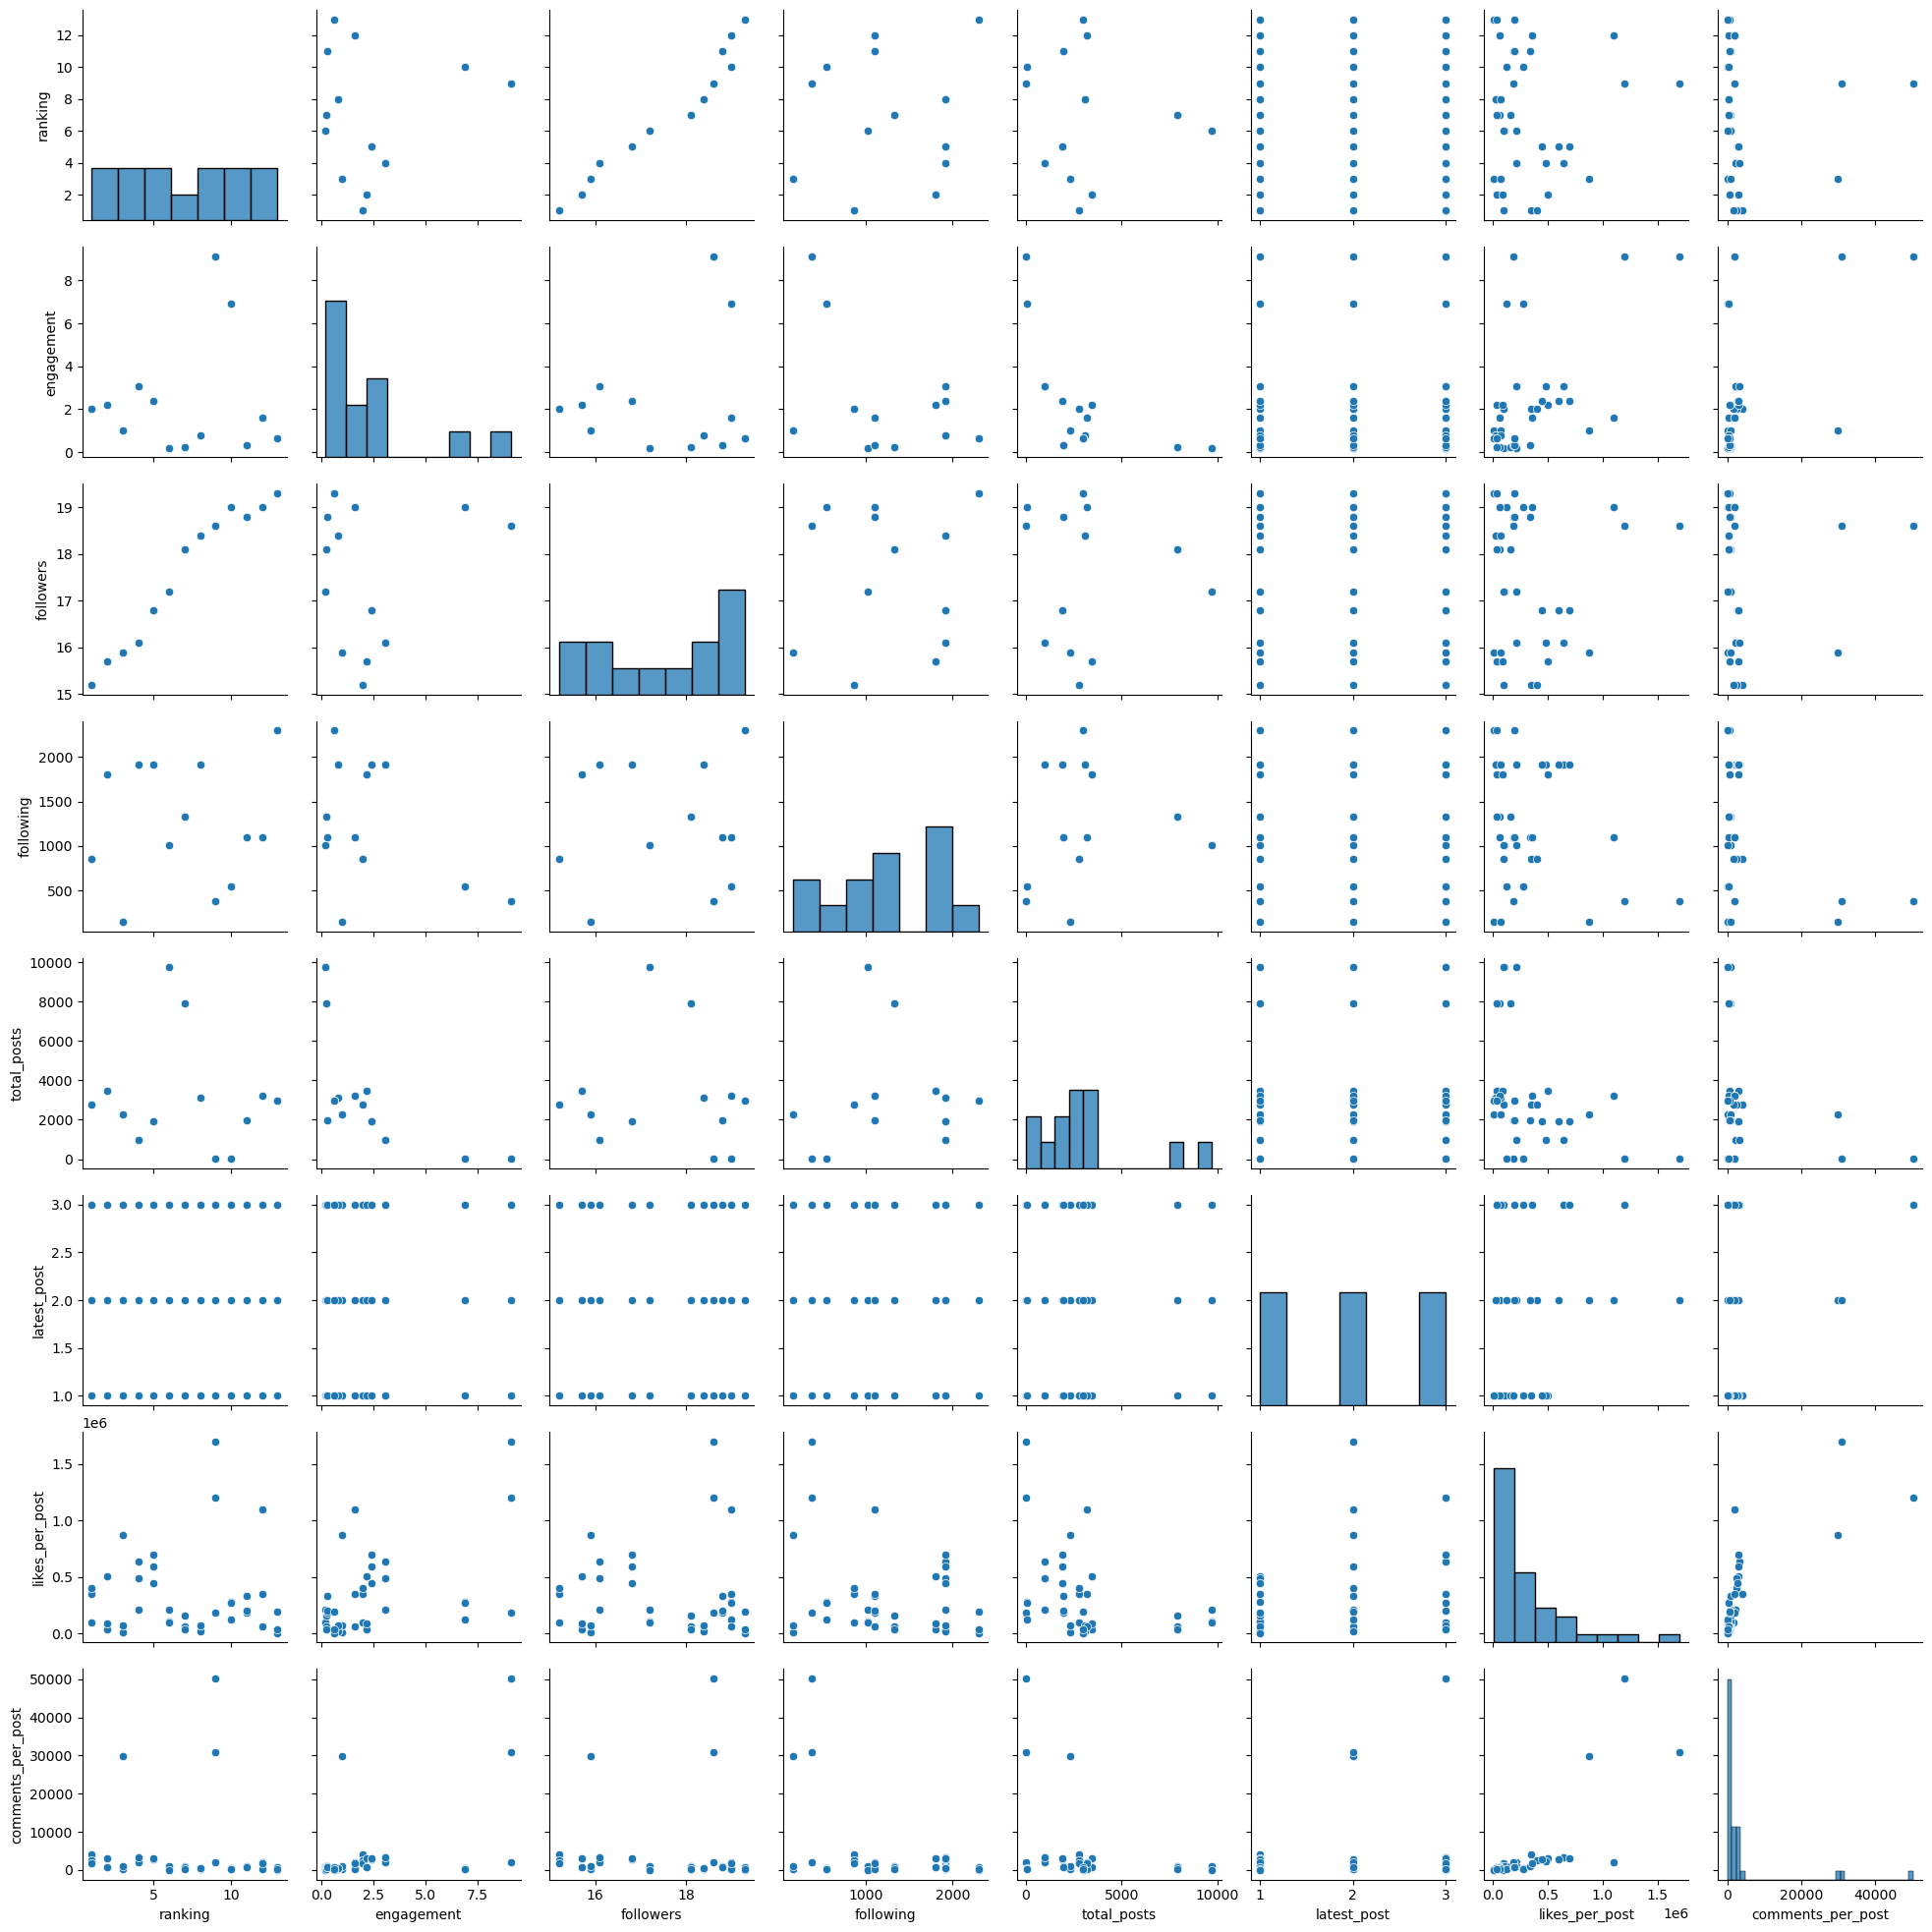

In [37]:
sns.pairplot(data)
plt.show()

In [3]:
data.columns

Index(['ranking', 'username', 'alias', 'categories', 'engagement', 'followers',
       'following', 'total_posts', 'latest_post', 'post_type',
       'likes_per_post', 'comments_per_post', 'partnership_posts',
       'channel_associated_on_bio', 'subscription_date', 'content'],
      dtype='object')

In [38]:
average_comments_per_post = data.pivot_table(index=["ranking", "username"], values=["comments_per_post"], aggfunc= {"comments_per_post" : ["sum", "mean", "median", "min", "max"]})
average_comments_per_post
average_comments_per_post
# create new columns then 

comments_per_post                                 \
                                       max          mean   median     min   
ranking username                                                            
1.0     @gessicakayane              4043.0   2790.333333   2538.0  1790.0   
2.0     @andressasuita              3084.0   1519.666667    763.0   712.0   
3.0     @leonardo                  29800.0  10330.333333    965.0   226.0   
4.0     @taina                      3294.0   2598.000000   2373.0  2127.0   
5.0     @cocielo                    2956.0   2895.666667   2896.0  2835.0   
6.0     @jujusalimeni                952.0    608.333333    873.0     0.0   
7.0     @lexa                        907.0    606.666667    610.0   303.0   
8.0     @flaviapavanelli             451.0    372.666667    355.0   312.0   
9.0     @luvadepedreiro            50200.0  27704.333333  31000.0  1913.0   
10.0    @kjapa                       361.0    275.000000    303.0   161.0   
11.0    @camilaqueiroz              1012.0    815.000000    753.0   680.0   
12.0    @marimaria                  2072.0   1423.666667   1878.0   321.0   
13.0    @rafaavitti                  737.0    299.000000    113.0    47.0   

                                   
                              sum  
ranking username                   
1.0     @gessicakayane     8371.0  
2.0     @andressasuita     4559.0  
3.0     @leonardo         30991.0  
4.0     @taina             7794.0  
5.0     @cocielo           8687.0  
6.0     @jujusalimeni      1825.0  
7.0     @lexa              1820.0  
8.0     @flaviapavanelli   1118.0  
9.0     @luvadepedreiro   83113.0  
10.0    @kjapa              825.0  
11.0    @camilaqueiroz     2445.0  
12.0    @marimaria         4271.0  
13.0    @rafaavitti         897.0

In [64]:
average_comments_per_post.columns

MultiIndex([('comments_per_post',    'max'),
            ('comments_per_post',   'mean'),
            ('comments_per_post', 'median'),
            ('comments_per_post',    'min'),
            ('comments_per_post',    'sum')],
           )

In [65]:
average_comments_per_post.columns = average_comments_per_post.columns.droplevel()

In [66]:
average_comments_per_post.columns = ["max_comment", "mean_comment", "median_comment", "min_comment", "sum_comment"]

In [67]:
average_comments_per_post.loc[1]["sum_comment"]

username
@gessicakayane    8371.0
Name: sum_comment, dtype: float64

In [39]:
average_likes_per_post = data.pivot_table(index=["ranking", "username"], values=["likes_per_post"], aggfunc= {"likes_per_post" : ["sum", "mean", "median", "min", "max"]})
average_likes_per_post
# create new columns then 

likes_per_post                                     \
                                    max          mean     median       min   
ranking username                                                             
1.0     @gessicakayane         401000.0  2.828667e+05   351000.0   96600.0   
2.0     @andressasuita         505000.0  2.098000e+05    89900.0   34500.0   
3.0     @leonardo              874000.0  3.182000e+05    69900.0   10700.0   
4.0     @taina                 642000.0  4.466667e+05   486000.0  212000.0   
5.0     @cocielo               697000.0  5.793333e+05   596000.0  445000.0   
6.0     @jujusalimeni          211000.0  1.400000e+05   108000.0  101000.0   
7.0     @lexa                  163000.0  8.826667e+04    64200.0   37600.0   
8.0     @flaviapavanelli        70100.0  3.963333e+04    25300.0   23500.0   
9.0     @luvadepedreiro       1700000.0  1.029333e+06  1200000.0  188000.0   
10.0    @kjapa                 280000.0  2.273333e+05   274000.0  128000.0   
11.0    @camilaqueiroz         336000.0  2.393333e+05   199000.0  183000.0   
12.0    @marimaria            1100000.0  5.048000e+05   353000.0   61400.0   
13.0    @rafaavitti            193000.0  7.807067e+04    34700.0    6512.0   

                                     
                                sum  
ranking username                     
1.0     @gessicakayane     848600.0  
2.0     @andressasuita     629400.0  
3.0     @leonardo          954600.0  
4.0     @taina            1340000.0  
5.0     @cocielo          1738000.0  
6.0     @jujusalimeni      420000.0  
7.0     @lexa              264800.0  
8.0     @flaviapavanelli   118900.0  
9.0     @luvadepedreiro   3088000.0  
10.0    @kjapa             682000.0  
11.0    @camilaqueiroz     718000.0  
12.0    @marimaria        1514400.0  
13.0    @rafaavitti        234212.0

In [56]:
average_likes_per_post.columns

MultiIndex([('likes_per_post',    'max'),
            ('likes_per_post',   'mean'),
            ('likes_per_post', 'median'),
            ('likes_per_post',    'min'),
            ('likes_per_post',    'sum')],
           )

In [ ]:
average_likes_per_post.columns = average_likes_per_post.columns.droplevel()

In [61]:
average_likes_per_post.columns = ["max_like", "mean_like", "median_like", "min_like", "sum_like"]

In [63]:
average_likes_per_post.loc[1]["sum_like"]

username
@gessicakayane    848600.0
Name: sum_like, dtype: float64

In [69]:
data.loc[1]["followers"] * 1000000

15200000.0

In [72]:
engagement = (average_likes_per_post.loc[1]["sum_like"] + average_comments_per_post.loc[1]["sum_comment"]) * 100 / (data.loc[1]["followers"] * 1000000)
engagement

username
@gessicakayane    5.637967
dtype: float64

In [75]:
sum_of_likes = []

for number in average_likes_per_post["sum_like"]:
    sum_of_likes.append(number)

sum_of_likes

[848600.0,
 629400.0,
 954600.0,
 1340000.0,
 1738000.0,
 420000.0,
 264800.0,
 118900.0,
 3088000.0,
 682000.0,
 718000.0,
 1514400.0,
 234212.0]

In [76]:
sum_of_comments = []

for number in average_comments_per_post["sum_comment"]:
    sum_of_comments.append(number)

sum_of_comments

[8371.0,
 4559.0,
 30991.0,
 7794.0,
 8687.0,
 1825.0,
 1820.0,
 1118.0,
 83113.0,
 825.0,
 2445.0,
 4271.0,
 897.0]

In [77]:
likes_and_comments = [like + comment for like, comment in zip(sum_of_likes, sum_of_comments)]
likes_and_comments

[856971.0,
 633959.0,
 985591.0,
 1347794.0,
 1746687.0,
 421825.0,
 266620.0,
 120018.0,
 3171113.0,
 682825.0,
 720445.0,
 1518671.0,
 235109.0]

In [79]:
total_followers = data.pivot_table(index=["username"], values=["followers"], aggfunc= {"followers" : ["mean"]})
total_followers

,followers
,mean
username,
@andressasuita,15.7
@camilaqueiroz,18.8
@cocielo,16.8
@flaviapavanelli,18.4
@gessicakayane,15.2
@jujusalimeni,17.2
@kjapa,19.0
@leonardo,15.9


In [80]:
total_followers.columns

MultiIndex([('followers', 'mean')],
           )

In [81]:
total_followers.columns = total_followers.columns.droplevel()

In [82]:
total_followers.columns = ["total_followers"]

In [84]:
total_followers

,total_followers
username,
@andressasuita,15.7
@camilaqueiroz,18.8
@cocielo,16.8
@flaviapavanelli,18.4
@gessicakayane,15.2
@jujusalimeni,17.2
@kjapa,19.0
@leonardo,15.9
@lexa,18.1


In [85]:
followers_multiplied = []

for number in total_followers["total_followers"]:
    followers_multiplied.append(number * 1000000)

followers_multiplied

[15699999.999999998,
 18800000.0,
 16800000.0,
 18400000.0,
 15199999.999999998,
 17200000.0,
 19000000.0,
 15900000.0,
 18100000.0,
 18600000.0,
 19000000.0,
 19300000.0,
 16100000.000000002]

In [86]:
engagement = [(likes_comments * 100) / followers for likes_comments, followers in zip(likes_and_comments, followers_multiplied)]
engagement

[5.458414012738854,
 3.372122340425532,
 5.866613095238095,
 7.324967391304348,
 11.491361842105265,
 2.452470930232558,
 1.4032631578947368,
 0.7548301886792452,
 17.51996132596685,
 3.6711021505376342,
 3.7918157894736844,
 7.868761658031088,
 1.4603043478260869]

In [93]:
print(max(engagement))
print(min(engagement))
print(np.mean(engagement))
print(np.median(engagement))


17.51996132596685
0.7548301886792452
5.571999094650305
3.7918157894736844


In [88]:
data.dtypes

ranking                      float64
username                      object
alias                         object
categories                    object
engagement                   float64
followers                    float64
following                    float64
total_posts                  float64
latest_post                  float64
post_type                     object
likes_per_post               float64
comments_per_post            float64
partnership_posts             object
channel_associated_on_bio     object
subscription_date             object
content                       object
dtype: object

In [32]:
data.select_dtypes('number').head(5)

,ranking,engagement,followers,following,total_posts,latest_post,likes_per_post,comments_per_post
0,1.0,2.00,15.2,854.0,2783.0,1.0,351000.0,4043.0
1,1.0,2.00,15.2,854.0,2783.0,2.0,401000.0,2538.0
2,1.0,2.00,15.2,854.0,2783.0,3.0,96600.0,1790.0
3,2.0,2.19,15.7,1805.0,3453.0,1.0,505000.0,3084.0
4,2.0,2.19,15.7,1805.0,3453.0,2.0,34500.0,763.0


In [6]:
data.skew()

# checking if negative or positive skew 

C:\Users\Cristiana\AppData\Local\Temp\ipykernel_14800\846527599.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


ranking              0.000000
engagement           1.662894
followers           -0.341857
following           -0.091245
total_posts          1.353838
latest_post          0.000000
likes_per_post       2.033486
comments_per_post    3.663333
dtype: float64

c:\Users\Cristiana\anaconda3\envs\ironhack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


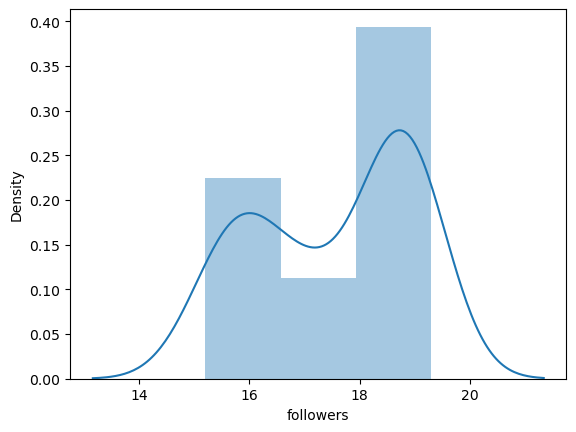

In [10]:
sns.distplot(data["followers"])
plt.show()

c:\Users\Cristiana\anaconda3\envs\ironhack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


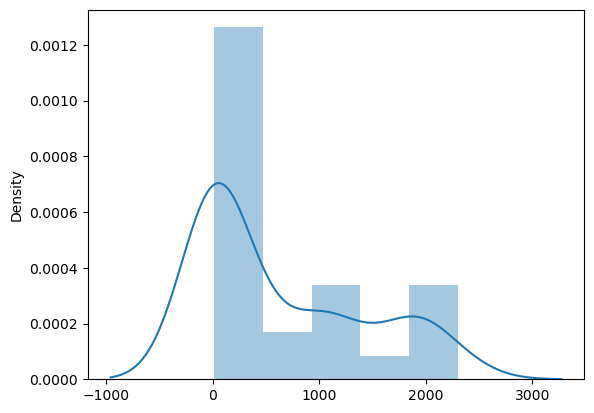

In [14]:
sns.distplot(data[["followers","following"]])
plt.show()

c:\Users\Cristiana\anaconda3\envs\ironhack\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


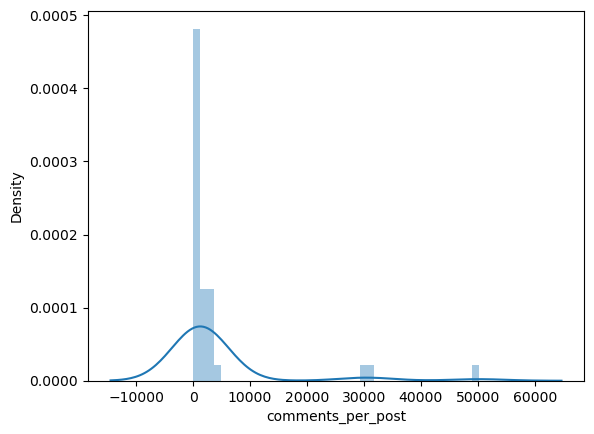

In [7]:
sns.distplot(data["comments_per_post"])
plt.show()

# correlations

In [11]:
data.columns

Index(['ranking', 'username', 'alias', 'categories', 'engagement', 'followers',
       'following', 'total_posts', 'latest_post', 'post_type',
       'likes_per_post', 'comments_per_post', 'partnership_posts',
       'channel_associated_on_bio', 'subscription_date', 'content'],
      dtype='object')

In [12]:
data[["engagement", "followers", "total_posts", "likes_per_post", "comments_per_post"]].corr()

# 

,engagement,followers,total_posts,likes_per_post,comments_per_post
engagement,1.000000,0.160126,-0.627729,0.506293,0.505051
followers,0.160126,1.000000,-0.070192,-0.004894,0.007653
total_posts,-0.627729,-0.070192,1.000000,-0.364772,-0.281981
likes_per_post,0.506293,-0.004894,-0.364772,1.000000,0.751714
comments_per_post,0.505051,0.007653,-0.281981,0.751714,1.000000


<AxesSubplot:>

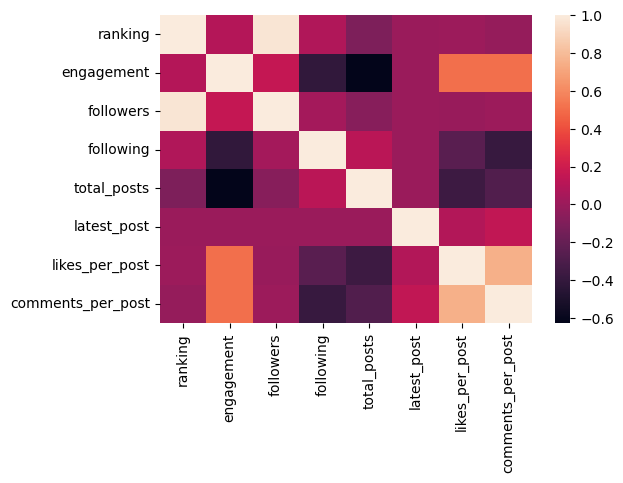

In [14]:
# heatmap 

plt.figure(figsize=(6,4))
sns.heatmap(data.corr())

# covariances

In [21]:
print(data["engagement"].cov(data["likes_per_post"]))

# With a negative covariance, that means what we already noticed: 
# when one variable goes up, the other goes down. 

495851.2062348179


# Spearman correlation 

Because we just care to know if one variable increase, what happens to the other 
does not increase, decrease, of affect it at all.
The magnitude of the influence is not important.

Ex.: I don't care to see if I study 10 more minutes, the grade increase 1 point on grade 
I care if I study more, I get better grades.

In [ ]:
# let's try to correlate number with number?

# examples
# followers with avg comments 
# followers with avg likes 
# followers with engagement 


# Logistic Regression Model 

In [23]:
data.columns

Index(['ranking', 'username', 'alias', 'categories', 'engagement', 'followers',
       'following', 'total_posts', 'latest_post', 'post_type',
       'likes_per_post', 'comments_per_post', 'partnership_posts',
       'channel_associated_on_bio', 'subscription_date', 'content'],
      dtype='object')

In [24]:
X = data[['followers', 'following', 'total_posts', 'likes_per_post', 'comments_per_post']]
y = data['type_of_engagement']
# type of engagement will be generated by 2 bins based on : 
# from 0 to 5 : low engagement = 0 
# from 5 to 10 or higher : high engagement = 1 
# we will have to generate this new column 


X.head()

,followers,following,total_posts,likes_per_post,comments_per_post
0,15.2,854.0,2783.0,351000.0,4043.0
1,15.2,854.0,2783.0,401000.0,2538.0
2,15.2,854.0,2783.0,96600.0,1790.0
3,15.7,1805.0,3453.0,505000.0,3084.0
4,15.7,1805.0,3453.0,34500.0,763.0


In [25]:
#  create our model 

logistic = linear_model.LogisticRegression()

In [ ]:
# train the model 

logistic.fit(X,y)

In [ ]:
# evaluate the model 

logistic.score(X,y)

# accuracy score : near --%

In [ ]:
from sklearn.preprocessing import StandardScaler

# create the scaler 

scaler = StandardScaler()

# fit our data to the standard scaler 
scaler.fit(X)

# transform the data
scaler.transform(X)

In [ ]:
scaled_X = pd.DataFrame(scaler.transform(X), columns=X.columns)
scaled_X

# inserting new values : new instagram accounts 

In [ ]:
# inserting new values : new clients 

new_clients = pd.DataFrame([{'SeniorCitizen':1, 'tenure':2, 'MonthlyCharges':90.20},
 {'SeniorCitizen':1, 'tenure':40, 'MonthlyCharges':32.45},
 {'SeniorCitizen':0, 'tenure':3, 'MonthlyCharges':85.15},
 {'SeniorCitizen':0, 'tenure':44,'MonthlyCharges':40.45}])

new_clients

In [ ]:
# predict using the logistic 1 which was trained in data that was not standardized 
logistic.predict(new_clients)

In [ ]:
# in case the scaled data worked better with your model, 
# you will need to do the same scaling to the new data points collected 

# the same feature engeneering done on the training data need to be done 
# also on the test data | new data 

# need to scale new clients 

new_clients = pd.DataFrame([{'SeniorCitizen':1, 'tenure':2, 'MonthlyCharges':90.20},
 {'SeniorCitizen':1, 'tenure':40, 'MonthlyCharges':32.45},
 {'SeniorCitizen':0, 'tenure':3, 'MonthlyCharges':85.15},
 {'SeniorCitizen':0, 'tenure':44,'MonthlyCharges':40.45}])

new_clients_scaled = scaler.transform(new_clients)
new_clients_scaled_df = pd.DataFrame(new_clients_scaled, 
                                columns= ["SeniorCitizen", "tenure" ,"MonthlyCharges"])

new_clients_scaled_df

In [ ]:
# how to predict 

logistic2.predict(new_clients_scaled_df)